In [47]:
#make the import
import pandas as pd
import numpy as np

In [48]:
#recall the data
%store -r Xrg
%store -r Yrg
%store -r rg
print(Xrg.shape)

(562, 2074)


In [49]:
#Import the tools we will use to reduce redundant information

import sys
sys.path.append("..")
from source.utils import creat_rollingData, skew_df, mean_df, kurt_df

In [50]:
#using the creat_rollingData

# ___Cell no. 9___

Xrg_arrayRol  = creat_rollingData (df = Xrg, window_arr = [10, 30, 50, 100], method =  mean_df )

Xrg_arrayRol_sk  = creat_rollingData (df = Xrg, window_arr = [10, 30, 50, 100], method =  skew_df )

# let us see the shape of the created rolled dataframes
for x in Xrg_arrayRol:
    print(x.shape)


(562, 207)
(562, 69)
(562, 41)
(562, 20)


In [29]:
#To visualize the data

from source.graphs import graph_df

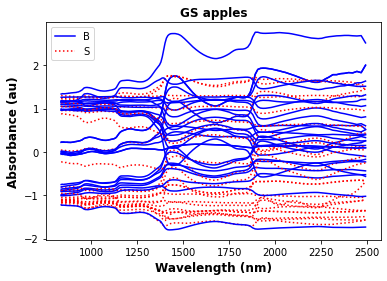

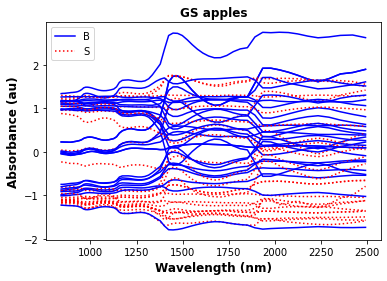

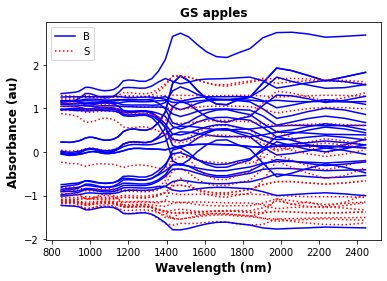

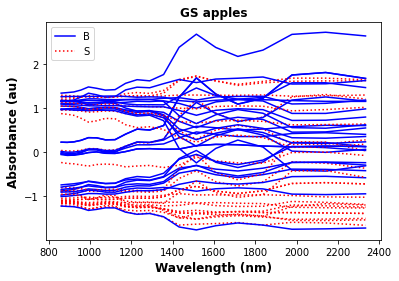

In [30]:
graph_df (Xrg_arrayRol, Yrg, n = 50)

In [51]:
# ___Cell no. 12___

from source.utils import split #  a pre-defined function to split the data into training and testing
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [52]:
Yrg = Yrg.map({'S': 1, 'B': 0})
Yrg

0      0
1      0
2      1
3      1
4      0
      ..
557    1
558    0
559    0
560    1
561    1
Name: Condition, Length: 562, dtype: int64

In [53]:
selected_RGindexes=[]
selected_RGindexes_sk=[]

for x_roll in Xrg_arrayRol:
    Xrgtrain,Xrgtest,Yrgtrain,Yrgtest=split(x_roll,Yrg)
    print("(Number of samples, number of features) = ", Xrgtrain.shape)
    sfs = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=10, direction = 'forward', scoring = 'precision' ) 
    sfs.fit(Xrgtrain.values, Yrgtrain)
    selected_RGindexes.append(sfs.support_)
    
for x_rol in Xrg_arrayRol_sk:
    Xrgtrain_sk,Xrgtest_sk,Yrgtrain_sk,Yrgtest_sk=split(x_rol,Yrg)
    print("(Number of samples, number of features) = ", Xrgtrain_sk.shape)
    sfs = SequentialFeatureSelector(estimator=LogisticRegression(solver = 'newton-cg'), n_features_to_select=10, direction = 'forward', scoring = 'precision' ) 
    sfs.fit(Xrgtrain_sk.values, Yrgtrain_sk)
    selected_RGindexes_sk.append(sfs.support_)
    

(Number of samples, number of features) =  (393, 207)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 69)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 41)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 20)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 207)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 69)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 41)


/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/workshop/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is i

(Number of samples, number of features) =  (393, 20)


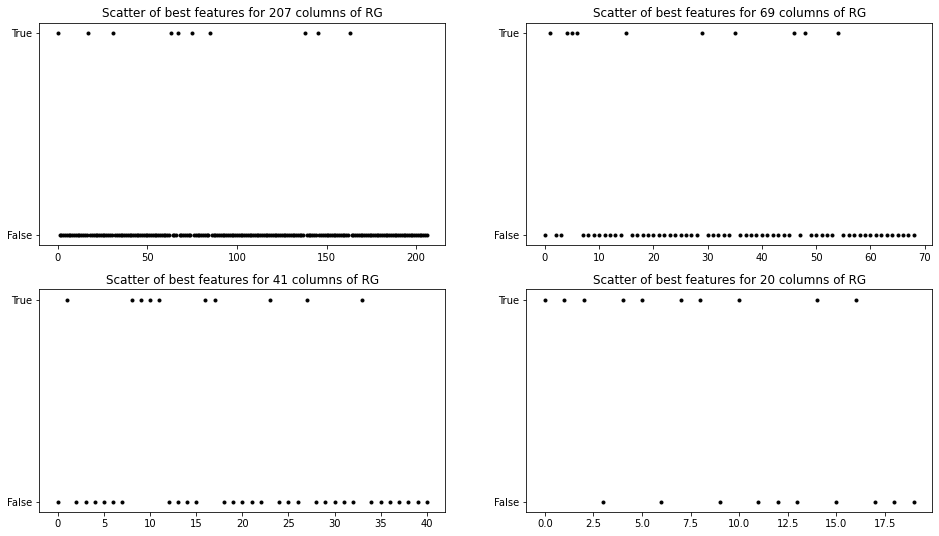

In [42]:
## Scatter Plot
import matplotlib.pyplot as plt
a=selected_RGindexes[0].astype(int)
b=selected_RGindexes[1].astype(int)
c=selected_RGindexes[2].astype(int)
d=selected_RGindexes[3].astype(int)


fig,ax = plt.subplots(2,2,figsize=(16,9))
ax[0, 0].plot(a,'k.',)
ax[0, 0].set_yticks([1.0, 0.0],["True", "False"])
ax[0, 0].title.set_text("Scatter of best features for 207 columns of RG")

ax[0, 1].plot(b,'k.')
ax[0, 1].set_yticks([1.0, 0.0],["True", "False"])
ax[0, 1].title.set_text("Scatter of best features for 69 columns of RG")

ax[1, 0].plot(c,'k.')
ax[1, 0].set_yticks([1.0, 0.0],["True", "False"])
ax[1, 0].title.set_text("Scatter of best features for 41 columns of RG")

ax[1, 1].plot(d,'k.')
ax[1, 1].set_yticks([1.0, 0.0],["True", "False"])
ax[1, 1].title.set_text("Scatter of best features for 20 columns of RG")
plt.show()     

In [54]:
%store  Xrg_arrayRol
%store  selected_RGindexes

%store  Xrg_arrayRol_sk
%store  selected_RGindexes_sk

Stored 'Xrg_arrayRol' (list)
Stored 'selected_RGindexes' (list)
Stored 'Xrg_arrayRol_sk' (list)
Stored 'selected_RGindexes_sk' (list)
